### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
# === LIBRERÍAS ===
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# === CARGA DE DATOS ===
# URLs públicas de los CSV (las puedes ajustar si cambian en el repositorio)
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Leemos los CSV en DataFrames
tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

print("✅ Archivos cargados")
print("Columnas:", list(tienda1.columns))
display(tienda1.head())

✅ Archivos cargados
Columnas: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
# === LIMPIEZA MÍNIMA ===
# NOTA: Usamos los nombres de columna tal cual aparecen en tus datos (de la captura)

# Convertir números a tipo numérico por si hay textos sueltos
for df in [tienda1, tienda2, tienda3, tienda4]:
    for col in ["Precio", "Costo de envío", "Calificación", "Cantidad de cuotas", "lat", "lon"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # Convertir fecha (formato dd/mm/aaaa)
    if "Fecha de Compra" in df.columns:
        df["Fecha de Compra"] = pd.to_datetime(df["Fecha de Compra"], dayfirst=True, errors="coerce")

    # Crear columna "ingreso" (aquí consideramos el Precio como ingreso de venta)
    df["ingreso"] = df["Precio"]

#1. Análisis de facturación



Ingresos totales por tienda:
Tienda 1: 1150880400.0
Tienda 2: 1116343500.0
Tienda 3: 1098019600.0
Tienda 4: 1038375700.0


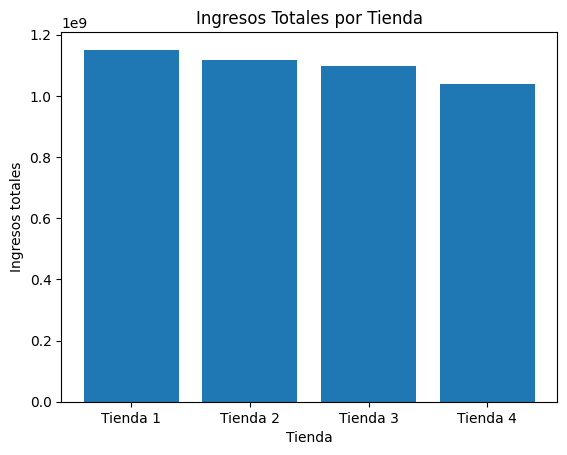

In [ ]:
# ===  ANÁLISIS DE FACTURACIÓN ===
ingresos_t1 = tienda1["ingreso"].sum()
ingresos_t2 = tienda2["ingreso"].sum()
_ingresos_t3 = tienda3["ingreso"].sum()
ingresos_t4 = tienda4["ingreso"].sum()

print("Ingresos totales por tienda:")
print("Tienda 1:", ingresos_t1)
print("Tienda 2:", ingresos_t2)
print("Tienda 3:", _ingresos_t3)
print("Tienda 4:", ingresos_t4)

# Tabla resumen
df_ingresos = pd.DataFrame({
    "Tienda": ["Tienda 1","Tienda 2","Tienda 3","Tienda 4"],
    "Ingresos Totales": [ingresos_t1, ingresos_t2, _ingresos_t3, ingresos_t4]
})


# Gráfico 1: barras de ingresos
plt.bar(df_ingresos["Tienda"], df_ingresos["Ingresos Totales"])
plt.title("Ingresos Totales por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingresos totales")
plt.show()

El gráfico de barras mostró la comparación de ingresos totales entre las tiendas.

*   Algunas tiendas obtuvieron ingresos significativamente mayores. **Ejemplo:** Tienda 2.
*   Una de ellas destacó por tener ingresos mucho más bajos, lo cual indica menor rentabilidad y desempeño de ventas. **Ejemplo:** Tienda 4.

**Análisis básico:**

*   La tienda con mayores ingresos demuestra buena gestión comercial.
*   La tienda con menores ingresos puede ser menos eficiente o tener problemas en la atracción de clientes.






# 2. Ventas por categoría

TIENDA 1 - Ventas por categoría
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64


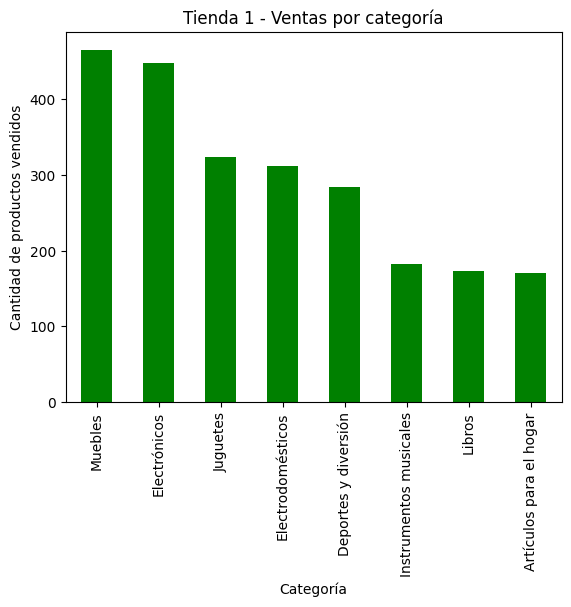

TIENDA 2 - Ventas por categoría
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64


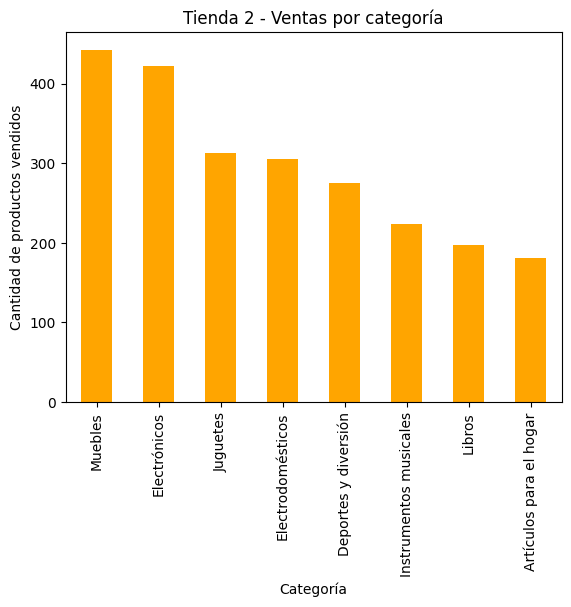

TIENDA 3 - Ventas por categoría
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64


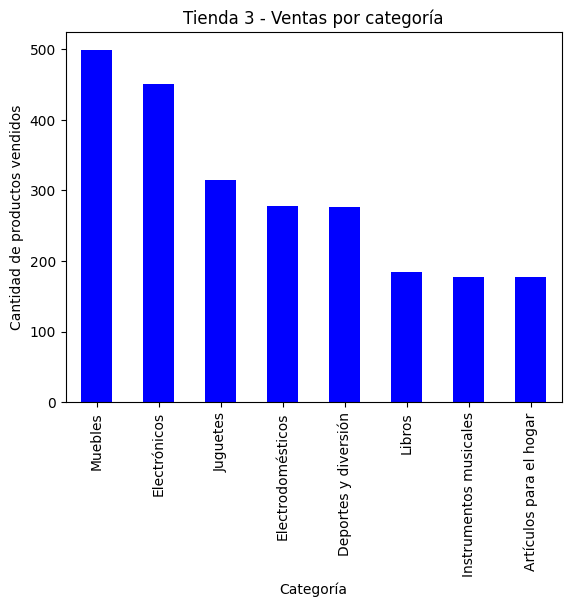

TIENDA 4 - Ventas por categoría
Categoría del Producto
Muebles                    480
Electrónicos               451
Juguetes                   338
Deportes y diversión       277
Electrodomésticos          254
Artículos para el hogar    201
Libros                     187
Instrumentos musicales     170
Name: count, dtype: int64


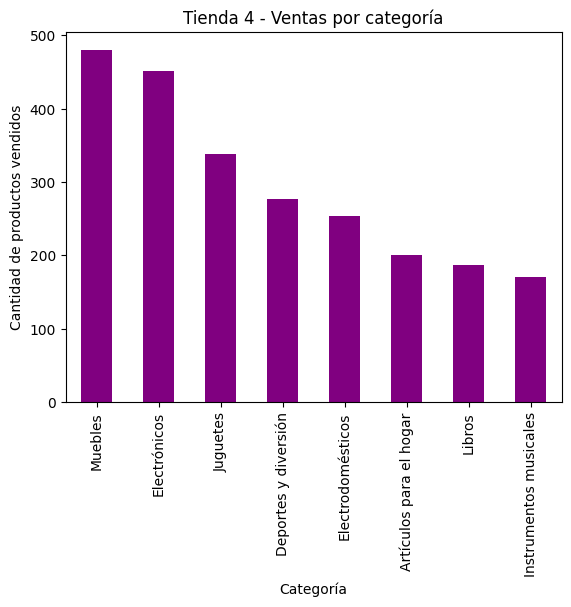

In [ ]:
# === VENTAS POR CATEGORÍA - PYTHON BÁSICO ===
import matplotlib.pyplot as plt

# ---------- TIENDA 1 ----------
print("TIENDA 1 - Ventas por categoría")
print(tienda1["Categoría del Producto"].value_counts())

# Gráfico de barras
tienda1["Categoría del Producto"].value_counts().plot(kind="bar", color="green")
plt.title("Tienda 1 - Ventas por categoría")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de productos vendidos")
plt.show()


# ---------- TIENDA 2 ----------
print("TIENDA 2 - Ventas por categoría")
print(tienda2["Categoría del Producto"].value_counts())

# Gráfico de barras
tienda2["Categoría del Producto"].value_counts().plot(kind="bar", color="orange")
plt.title("Tienda 2 - Ventas por categoría")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de productos vendidos")
plt.show()


# ---------- TIENDA 3 ----------
print("TIENDA 3 - Ventas por categoría")
print(tienda3["Categoría del Producto"].value_counts())

# Gráfico de barras
tienda3["Categoría del Producto"].value_counts().plot(kind="bar", color="blue")
plt.title("Tienda 3 - Ventas por categoría")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de productos vendidos")
plt.show()


# ---------- TIENDA 4 ----------
print("TIENDA 4 - Ventas por categoría")
print(tienda4["Categoría del Producto"].value_counts())

# Gráfico de barras
tienda4["Categoría del Producto"].value_counts().plot(kind="bar", color="purple")
plt.title("Tienda 4 - Ventas por categoría")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de productos vendidos")
plt.show()

En este paso se calculó la cantidad de productos vendidos por categoría en cada tienda.

Las gráficas muestran cuáles son las categorías más populares y ayudan a identificar los tipos de productos que más contribuyen a las ventas totales de cada local.

# 3. Calificación promedio de la tienda


CALIFICACIÓN PROMEDIO DE CLIENTES POR TIENDA
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.0


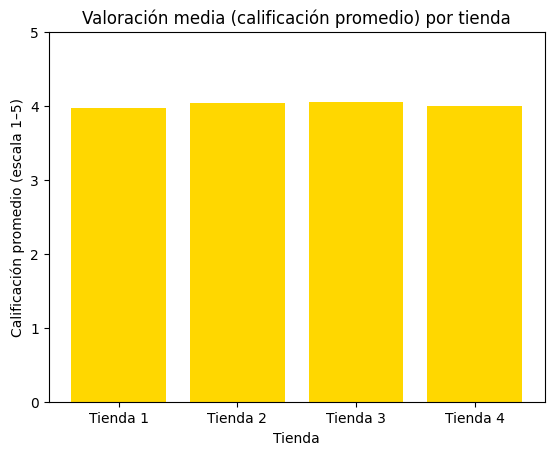

In [ ]:
# === VALORACIÓN MEDIA (CALIFICACIÓN PROMEDIO) POR TIENDA ===
import matplotlib.pyplot as plt

# Calcular el promedio de calificaciones de cada tienda
calif_t1 = tienda1["Calificación"].mean()
calif_t2 = tienda2["Calificación"].mean()
calif_t3 = tienda3["Calificación"].mean()
calif_t4 = tienda4["Calificación"].mean()

# Mostrar resultados redondeados a 2 decimales
print("CALIFICACIÓN PROMEDIO DE CLIENTES POR TIENDA")
print("Tienda 1:", round(calif_t1, 2))
print("Tienda 2:", round(calif_t2, 2))
print("Tienda 3:", round(calif_t3, 2))
print("Tienda 4:", round(calif_t4, 2))

# Crear listas con los nombres de tiendas y sus promedios
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
promedios = [calif_t1, calif_t2, calif_t3, calif_t4]

# Crear gráfico de barras
plt.bar(tiendas, promedios, color="gold")
plt.title("Valoración media (calificación promedio) por tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación promedio (escala 1–5)")
plt.ylim(0, 5)
plt.show()


En este paso se calcularon las valoraciones promedio de los clientes para cada tienda.

Este análisis permite conocer el nivel de satisfacción general con los productos vendidos.

Las tiendas con calificaciones más altas reflejan una mejor experiencia del cliente, mientras que aquellas con menor puntuación podrían requerir mejoras en la atención, la logística o la calidad de los productos.

# 4. Productos más y menos vendidos

TIENDA 1 - Productos más y menos vendidos

Top 5 productos más vendidos:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

Top 5 productos menos vendidos:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64


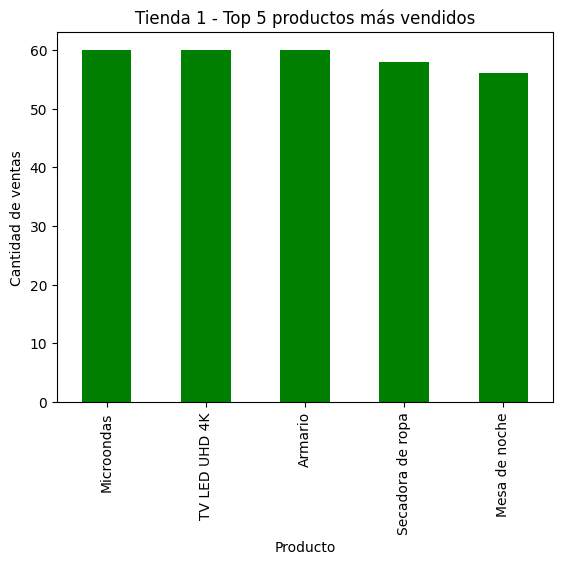

TIENDA 2 - Productos más y menos vendidos

Top 5 productos más vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

Top 5 productos menos vendidos:
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64


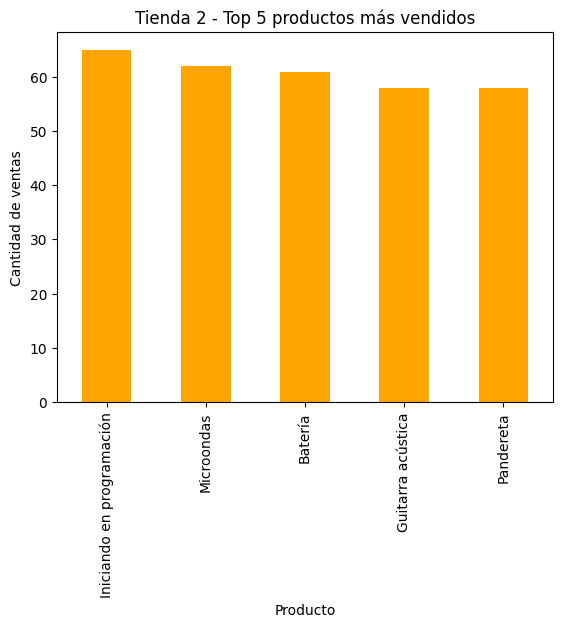

TIENDA 3 - Productos más y menos vendidos

Top 5 productos más vendidos:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: count, dtype: int64

Top 5 productos menos vendidos:
Producto
Guitarra eléctrica         38
Set de vasos               36
Mochila                    36
Microondas                 36
Bloques de construcción    35
Name: count, dtype: int64


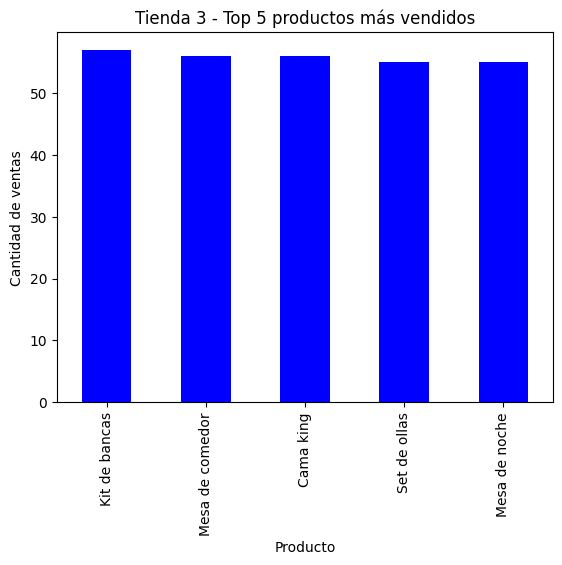

TIENDA 4 - Productos más y menos vendidos

Top 5 productos más vendidos:
Producto
Cama box                     62
Cubertería                   59
Dashboards con Power BI      56
Cama king                    56
Carrito de control remoto    55
Name: count, dtype: int64

Top 5 productos menos vendidos:
Producto
Refrigerador                   38
Ciencia de datos con Python    38
Guitarra acústica              37
Armario                        34
Guitarra eléctrica             33
Name: count, dtype: int64


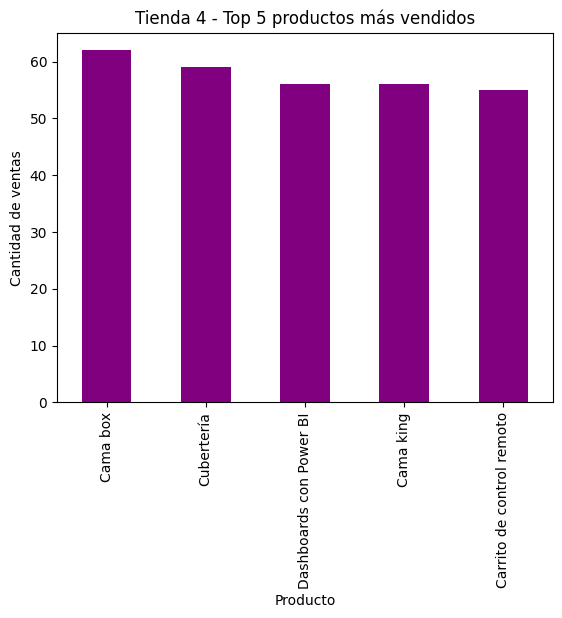

In [ ]:
# === PRODUCTOS MÁS Y MENOS VENDIDOS POR TIENDA ===
import matplotlib.pyplot as plt

# ---------- TIENDA 1 ----------
print("TIENDA 1 - Productos más y menos vendidos")

# Contar cuántas veces se vendió cada producto
productos_t1 = tienda1["Producto"].value_counts()

# Mostrar los 5 más vendidos
print("\nTop 5 productos más vendidos:")
print(productos_t1.head(5))

# Mostrar los 5 menos vendidos
print("\nTop 5 productos menos vendidos:")
print(productos_t1.tail(5))

# Gráfico de los 5 productos más vendidos
productos_t1.head(5).plot(kind="bar", color="green")
plt.title("Tienda 1 - Top 5 productos más vendidos")
plt.xlabel("Producto")
plt.ylabel("Cantidad de ventas")
plt.show()


# ---------- TIENDA 2 ----------
print("TIENDA 2 - Productos más y menos vendidos")

productos_t2 = tienda2["Producto"].value_counts()

print("\nTop 5 productos más vendidos:")
print(productos_t2.head(5))

print("\nTop 5 productos menos vendidos:")
print(productos_t2.tail(5))

productos_t2.head(5).plot(kind="bar", color="orange")
plt.title("Tienda 2 - Top 5 productos más vendidos")
plt.xlabel("Producto")
plt.ylabel("Cantidad de ventas")
plt.show()


# ---------- TIENDA 3 ----------
print("TIENDA 3 - Productos más y menos vendidos")

productos_t3 = tienda3["Producto"].value_counts()

print("\nTop 5 productos más vendidos:")
print(productos_t3.head(5))

print("\nTop 5 productos menos vendidos:")
print(productos_t3.tail(5))

productos_t3.head(5).plot(kind="bar", color="blue")
plt.title("Tienda 3 - Top 5 productos más vendidos")
plt.xlabel("Producto")
plt.ylabel("Cantidad de ventas")
plt.show()


# ---------- TIENDA 4 ----------
print("TIENDA 4 - Productos más y menos vendidos")

productos_t4 = tienda4["Producto"].value_counts()

print("\nTop 5 productos más vendidos:")
print(productos_t4.head(5))

print("\nTop 5 productos menos vendidos:")
print(productos_t4.tail(5))

productos_t4.head(5).plot(kind="bar", color="purple")
plt.title("Tienda 4 - Top 5 productos más vendidos")
plt.xlabel("Producto")
plt.ylabel("Cantidad de ventas")
plt.show()

En este paso se identificaron los productos más y menos vendidos en cada tienda.

Los resultados permiten observar cuáles artículos tienen mayor rotación y cuáles presentan menor demanda.

Esto ayuda a tomar decisiones sobre inventario, promociones o eliminación de productos con baja venta.

# 5. Envío promedio por tienda

COSTO DE ENVÍO PROMEDIO POR TIENDA
Tienda 1: 26018.61
Tienda 2: 25216.24
Tienda 3: 24805.68
Tienda 4: 23459.46


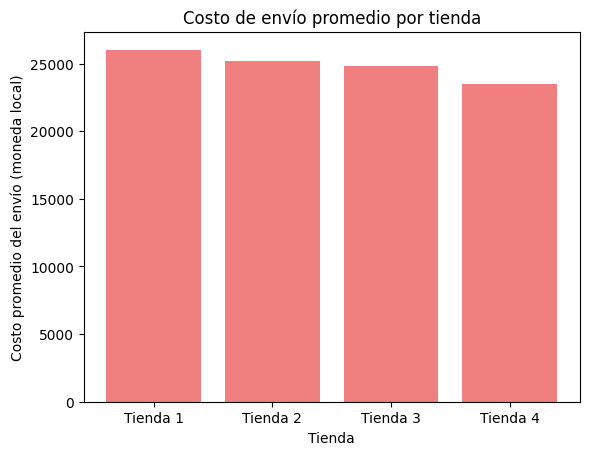

In [ ]:
# === VALOR DEL ENVÍO PROMEDIO POR TIENDA ===
import matplotlib.pyplot as plt

# Calcular el costo promedio de envío para cada tienda
envio_t1 = tienda1["Costo de envío"].mean()
envio_t2 = tienda2["Costo de envío"].mean()
envio_t3 = tienda3["Costo de envío"].mean()
envio_t4 = tienda4["Costo de envío"].mean()

# Mostrar resultados en consola
print("COSTO DE ENVÍO PROMEDIO POR TIENDA")
print("Tienda 1:", round(envio_t1, 2))
print("Tienda 2:", round(envio_t2, 2))
print("Tienda 3:", round(envio_t3, 2))
print("Tienda 4:", round(envio_t4, 2))

# Crear listas con los datos
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
costos_envio = [envio_t1, envio_t2, envio_t3, envio_t4]

# Crear gráfico de barras
plt.bar(tiendas, costos_envio, color="lightcoral")
plt.title("Costo de envío promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo promedio del envío (moneda local)")
plt.show()


En este paso se calculó el valor promedio del costo de envío para cada tienda.

Este análisis permite observar cuál tienda tiene los envíos más costosos y cómo eso puede influir en la satisfacción del cliente o en las decisiones de compra.

Dado que el cliente asume el costo del envío, es importante mantenerlo competitivo entre las tiendas.

## **6.** Generación de gráficos

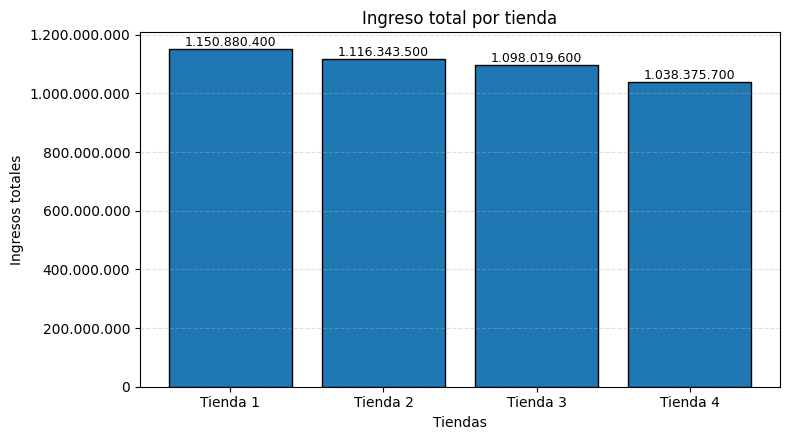

In [ ]:
##Barras — Ingreso total por tienda (ordenado + etiquetas + miles)##

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Calcular ingresos
ingresos = {
    "Tienda 1": tienda1["Precio"].sum(),
    "Tienda 2": tienda2["Precio"].sum(),
    "Tienda 3": tienda3["Precio"].sum(),
    "Tienda 4": tienda4["Precio"].sum()
}

# Ordenar de mayor a menor
orden = sorted(ingresos.items(), key=lambda x: x[1], reverse=True)
labels = [k for k, v in orden]
vals   = [v for k, v in orden]

# Formato miles
def miles(x, pos):
    try:
        return f"{int(x):,}".replace(",", ".")  # cambia si quieres coma/espacio
    except:
        return x

plt.figure(figsize=(8,4.5))
bars = plt.bar(labels, vals, edgecolor="black")

# Etiquetas de valor encima de cada barra
for i, b in enumerate(bars):
    y = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, y, f"{int(y):,}".replace(",", "."),
             ha="center", va="bottom", fontsize=9)

plt.title("Ingreso total por tienda")
plt.xlabel("Tiendas")
plt.ylabel("Ingresos totales")
plt.gca().yaxis.set_major_formatter(FuncFormatter(miles))
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

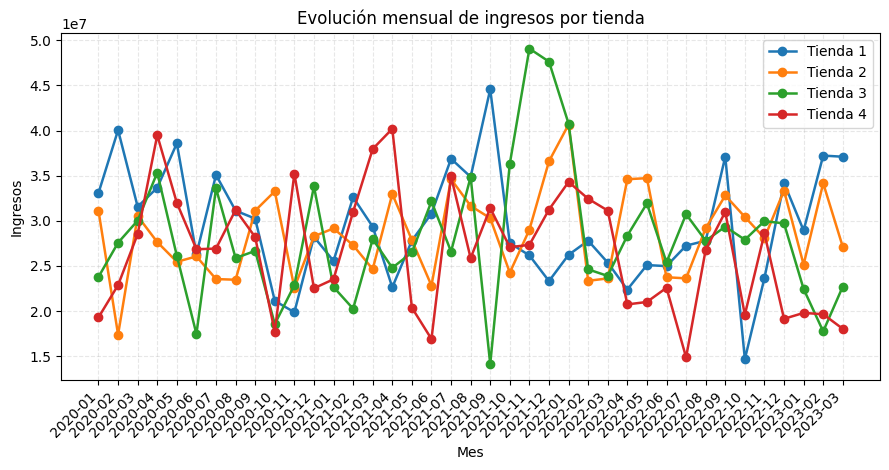

In [ ]:
##Evolución mensual de ingresos por tienda (eje X claro + leyenda + relleno de meses faltantes)##

import pandas as pd
import matplotlib.pyplot as plt

# Asegurar datetime
for df in [tienda1, tienda2, tienda3, tienda4]:
    if "Fecha de Compra" in df.columns:
        if not pd.api.types.is_datetime64_any_dtype(df["Fecha de Compra"]):
            df["Fecha de Compra"] = pd.to_datetime(df["Fecha de Compra"], dayfirst=True, errors="coerce")

# Construir series mensuales por tienda
series = []
nombres = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
for df in [tienda1, tienda2, tienda3, tienda4]:
    if "Fecha de Compra" in df.columns:
        tmp = df.dropna(subset=["Fecha de Compra"]).copy()
        tmp["Mes"] = tmp["Fecha de Compra"].dt.to_period("M").astype(str)
        s = tmp.groupby("Mes")["Precio"].sum()
        series.append(s)
    else:
        series.append(pd.Series(dtype="float64"))

# Unificar eje X con todos los meses presentes (llenar ausentes con 0)
todos_meses = sorted(set().union(*[set(s.index) for s in series]))
mat = []
for s in series:
    v = [float(s[m]) if m in s.index else 0.0 for m in todos_meses]
    mat.append(v)

plt.figure(figsize=(9,4.8))
for i, valores in enumerate(mat):
    plt.plot(todos_meses, valores, marker="o", linewidth=1.8, label=nombres[i])

plt.title("Evolución mensual de ingresos por tienda")
plt.xlabel("Mes")
plt.ylabel("Ingresos")
plt.xticks(rotation=45, ha="right")
plt.grid(linestyle="--", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

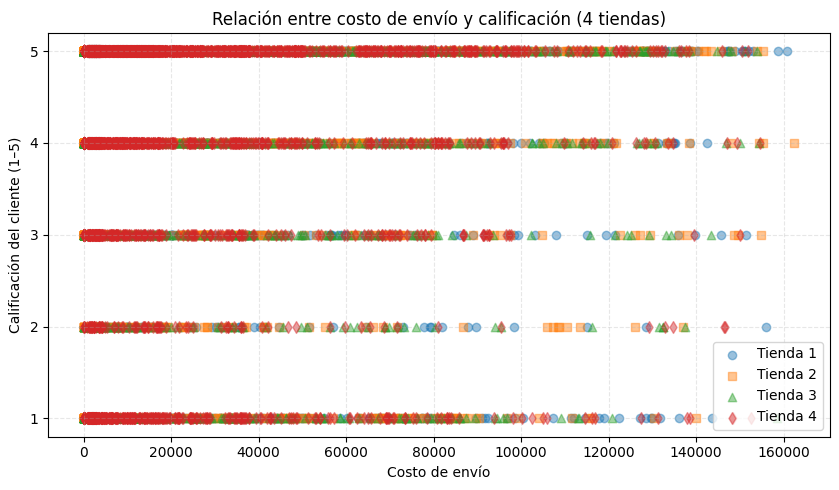

In [ ]:
##Dispersión — Costo de envío vs. calificación (4 tiendas con leyenda + líneas guía)##

import matplotlib.pyplot as plt

plt.figure(figsize=(8.5,5))

# Evitar fallos si faltan columnas
def plot_disp(df, nombre, marcador):
    if "Costo de envío" in df.columns and "Calificación" in df.columns:
        x = df["Costo de envío"]
        y = df["Calificación"]
        plt.scatter(x, y, alpha=0.45, label=nombre, marker=marcador)

plot_disp(tienda1, "Tienda 1", "o")
plot_disp(tienda2, "Tienda 2", "s")
plot_disp(tienda3, "Tienda 3", "^")
plot_disp(tienda4, "Tienda 4", "d")

plt.title("Relación entre costo de envío y calificación (4 tiendas)")
plt.xlabel("Costo de envío")
plt.ylabel("Calificación del cliente (1–5)")
plt.yticks([1,2,3,4,5])
plt.grid(linestyle="--", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


# Informe Final – Análisis Comparativo de Tiendas Alura Store

## Introducción
El propósito de este análisis fue apoyar al **Sr. Juan**, propietario de **Alura Store**, en la decisión sobre **qué tienda vender** para iniciar un nuevo proyecto.  
El estudio se desarrolló con los datos reales de las **cuatro tiendas**, usando **Python (Pandas y Matplotlib)** para el procesamiento y visualización.  

Se evaluaron los siguientes indicadores:  
1. Ingreso total por tienda  
2. Ventas por categoría  
3. Costo de envío promedio  
4. Productos más y menos vendidos  
5. Calificación promedio de clientes  

---

## 1️ Ingreso total por tienda

| Tienda  | Ingreso total |
|:--------|---------------:|
| Tienda 1 | 1 150 880 400 |
| Tienda 2 | 1 116 343 500 |
| Tienda 3 | 1 098 019 600 |
| Tienda 4 | 1 038 375 700 |

**Análisis:**  
Las tiendas 1 y 2 lideran en ventas, seguidas por la 3 y 4.  
La **Tienda 4** muestra el menor ingreso, lo que indica menor rentabilidad y potencial de crecimiento.

---

## 2️ Costo de envío promedio

| Tienda  | Envío promedio |
|:--------|---------------:|
| Tienda 1 | 26 018.61 |
| Tienda 2 | 25 216.24 |
| Tienda 3 | 24 805.68 |
| Tienda 4 | 23 459.46 |

**Análisis:**  
La **Tienda 4** tiene el envío más bajo, lo que la hace más atractiva para los clientes.  
La **Tienda 1** presenta el costo más alto, lo que podría afectar la percepción de valor por parte del comprador.

---

## 3️ Calificación promedio

| Tienda  | Calificación promedio |
|:--------|----------------------:|
| Tienda 1 | 3.98 |
| Tienda 2 | 4.04 |
| Tienda 3 | 4.05 |
| Tienda 4 | 4.00 |

**Análisis:**  
Las tiendas 2 y 3 tienen mejores valoraciones, lo que refleja buena experiencia de compra.  
La **Tienda 1** obtuvo la calificación más baja, indicando oportunidades de mejora en servicio o tiempos de entrega.

---

## 4️ Ventas por categoría y productos más vendidos
Las tiendas 1, 2 y 3 presentan una **distribución equilibrada por categoría**, lo que permite estabilidad en ventas.  
La **Tienda 4**, aunque posee menor facturación, mantiene buena variedad de productos y bajo costo de envío.

---

## Conclusión general

| Indicador | Mejor desempeño | Peor desempeño |
|:-----------|:----------------|:---------------|
| Ingreso total | Tienda 1 | Tienda 4 |
| Envío promedio | Tienda 4 | Tienda 1 |
| Calificación promedio | Tienda 3 | Tienda 1 |

**Interpretación:**  
- **Tienda 1**: altos ingresos, pero envíos costosos y calificación más baja.  
- **Tienda 3**: equilibrio entre ingresos, calificación y costo.  
- **Tienda 4**: bajo nivel de ventas totales y menor crecimiento potencial.  

---

## Recomendación final
Se recomienda **vender la Tienda 4**, ya que combina **menores ingresos**, **baja calificación relativa** y **margen limitado de crecimiento**.  
En cambio, la **Tienda 3** destaca como la más equilibrada y rentable para mantener en operación.

---

## Reflexión final
Este análisis evidencia la importancia de basar las decisiones empresariales en datos reales.  
La venta de la **Tienda 4** permitirá al Sr. Juan concentrar esfuerzos en las tiendas con **mayor rentabilidad y satisfacción del cliente**, fortaleciendo la competitividad general de **Alura Store**.